In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [ ]:
test=pd.read_csv('https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_training-set.csv')

In [ ]:
train=pd.read_csv('https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_testing-set.csv')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
test.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [ ]:
test.describe(include='object')

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


In [ ]:
train.shape

(175341, 45)

In [ ]:
test.shape

(82332, 45)

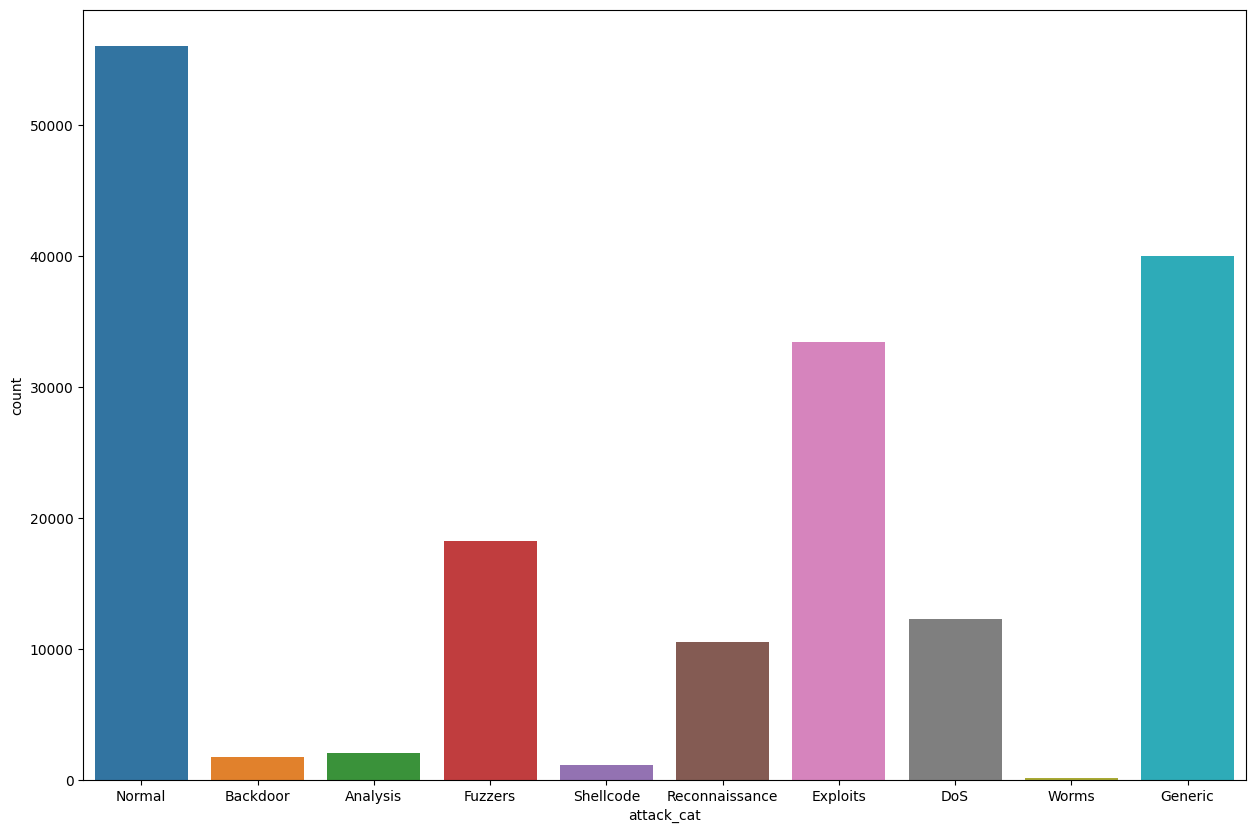

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=train['attack_cat'])
plt.show()

In [ ]:
print('Class distribution Training set:')
print(train['attack_cat'].value_counts())

Class distribution Training set:
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64


In [ ]:
print('Class distribution Testing set:')
print(test['attack_cat'].value_counts())

Class distribution Testing set:
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [ ]:
test = test[test['state'] != 'ACC']

In [ ]:
print(test['attack_cat'].value_counts())

Normal            36998
Generic           18871
Exploits          11131
Fuzzers            6061
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [ ]:
for col in train.columns:
    if train[col].dtype == 'object':
            label_encoder = LabelEncoder()
            train[col] = label_encoder.fit_transform(train[col])


In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [ ]:
print(train['attack_cat'].value_counts())

6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  int64  
 3   service            175341 non-null  int64  
 4   state              175341 non-null  int64  
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
for col in test.columns:
    if test[col].dtype == 'object':
            label_encoder1 = LabelEncoder()
            test[col] = label_encoder1.fit_transform(test[col])


In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,3,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,3,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,3,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,3,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,3,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


In [ ]:
print(test['attack_cat'].value_counts())

6    36998
5    18871
3    11131
4     6061
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: attack_cat, dtype: int64


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82328 non-null  int64  
 1   dur                82328 non-null  float64
 2   proto              82328 non-null  int64  
 3   service            82328 non-null  int64  
 4   state              82328 non-null  int64  
 5   spkts              82328 non-null  int64  
 6   dpkts              82328 non-null  int64  
 7   sbytes             82328 non-null  int64  
 8   dbytes             82328 non-null  int64  
 9   rate               82328 non-null  float64
 10  sttl               82328 non-null  int64  
 11  dttl               82328 non-null  int64  
 12  sload              82328 non-null  float64
 13  dload              82328 non-null  float64
 14  sloss              82328 non-null  int64  
 15  dloss              82328 non-null  int64  
 16  sinpkt             823

In [ ]:
X_train = train.drop(['attack_cat','id'],axis=1)
X_test = test.drop(['attack_cat','id'],axis=1)
#normalized
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
X_test=(X_test-X_train.min())/(X_train.max()-X_train.min())
Y_train = train['attack_cat']
Y_test = test['attack_cat']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  float64
 2   service            175341 non-null  float64
 3   state              175341 non-null  float64
 4   spkts              175341 non-null  float64
 5   dpkts              175341 non-null  float64
 6   sbytes             175341 non-null  float64
 7   dbytes             175341 non-null  float64
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  float64
 10  dttl               175341 non-null  float64
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  float64
 14  dloss              175341 non-null  float64
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82328 non-null  float64
 1   proto              82328 non-null  float64
 2   service            82328 non-null  float64
 3   state              82328 non-null  float64
 4   spkts              82328 non-null  float64
 5   dpkts              82328 non-null  float64
 6   sbytes             82328 non-null  float64
 7   dbytes             82328 non-null  float64
 8   rate               82328 non-null  float64
 9   sttl               82328 non-null  float64
 10  dttl               82328 non-null  float64
 11  sload              82328 non-null  float64
 12  dload              82328 non-null  float64
 13  sloss              82328 non-null  float64
 14  dloss              82328 non-null  float64
 15  sinpkt             82328 non-null  float64
 16  dinpkt             823

In [ ]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.002025,0.856061,0.00,0.25,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,...,0.00,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0
1,0.010832,0.856061,0.00,0.25,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,...,0.00,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.0
2,0.027052,0.856061,0.00,0.25,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,...,0.00,0.0,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.0
3,0.028027,0.856061,0.25,0.25,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,...,0.00,0.0,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.0
4,0.007491,0.856061,0.00,0.25,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,...,0.02,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.0


In [ ]:
X_train.shape

(175341, 43)

In [ ]:
Y_train.head()

0    6
1    6
2    6
3    6
4    6
Name: attack_cat, dtype: int64

In [ ]:
Y_test.head()

0    6
1    6
2    6
3    6
4    6
Name: attack_cat, dtype: int64

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.52685765 0.18728308]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
DTC.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train.values.ravel())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn import svm
S_V_M = svm.SVC()
S_V_M.fit(X_train, Y_train.values.ravel())


SVC()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
RFC.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [ ]:
Y_test_pred_1 = DTC.predict(X_test)
Y_test_pred_2 = LR.predict(X_test)
Y_test_pred_3 = S_V_M.predict(X_test)
Y_test_pred_4 = RFC.predict(X_test)

In [ ]:
X_train_pred_1 = DTC.predict(X_train)
X_train_pred_2 = LR.predict(X_train)
X_train_pred_3 = S_V_M.predict(X_train)
X_train_pred_4 = RFC.predict(X_train)

In [ ]:
#training accuracy
from sklearn.metrics import accuracy_score
Training_accuracy_DTC = accuracy_score(Y_train,X_train_pred_1)
Training_accuracy_LR = accuracy_score(Y_train,X_train_pred_2)
Training_accuracy_S_V_M = accuracy_score(Y_train,X_train_pred_3)
Training_accuracy_RFC = accuracy_score(Y_train,X_train_pred_4)
print('Training_accuracy_DTC:',Training_accuracy_DTC)
print('Training_accuracy_LR:',Training_accuracy_LR)
print('Training_accuracy_S_V_M:',Training_accuracy_S_V_M)
print('Training_accuracy_RFC:',Training_accuracy_RFC)

Training_accuracy_DTC: 0.7068911435431531
Training_accuracy_LR: 0.7501497082827177
Training_accuracy_S_V_M: 0.7491060276832001
Training_accuracy_RFC: 0.9093366639861755


In [ ]:
#testing accuracy
from sklearn.metrics import accuracy_score
accuracy_DTC = accuracy_score(Y_test,Y_test_pred_1)
accuracy_LR = accuracy_score(Y_test,Y_test_pred_2)
accuracy_S_V_M = accuracy_score(Y_test,Y_test_pred_3)
accuracy_RFC = accuracy_score(Y_test,Y_test_pred_4)
print('accuracy_DTC:',accuracy_DTC)
print('accuracy_LR:',accuracy_LR)
print('accuracy_S_V_M:',accuracy_S_V_M)
print('accuracy_RFC:',accuracy_RFC)

accuracy_DTC: 0.3351958021572248
accuracy_LR: 0.6086143231950247
accuracy_S_V_M: 0.44849868817413274
accuracy_RFC: 0.3352200952288407


In [ ]:
data = [["DecisionTreeClassifier", Training_accuracy_DTC, accuracy_DTC],
        ["Logistic Regression", Training_accuracy_LR, accuracy_LR],
        ["SVM", Training_accuracy_S_V_M, accuracy_S_V_M],
        ["Random Forest Classifier", Training_accuracy_RFC, accuracy_RFC]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════╤═══════════════╤══════════════╕
│ Model                    │   Train Score │   Test Score │
╞══════════════════════════╪═══════════════╪══════════════╡
│ DecisionTreeClassifier   │      0.706891 │     0.335196 │
├──────────────────────────┼───────────────┼──────────────┤
│ Logistic Regression      │      0.75015  │     0.608614 │
├──────────────────────────┼───────────────┼──────────────┤
│ SVM                      │      0.749106 │     0.448499 │
├──────────────────────────┼───────────────┼──────────────┤
│ Random Forest Classifier │      0.909337 │     0.33522  │
╘══════════════════════════╧═══════════════╧══════════════╛


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a classification report of DTC
print(classification_report(Y_test, Y_test_pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00      4089
           3       0.00      0.00      0.00     11131
           4       0.09      0.61      0.15      6061
           5       0.53      0.97      0.69     18871
           6       0.96      0.15      0.26     36998
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.34     82328
   macro avg       0.16      0.17      0.11     82328
weighted avg       0.56      0.34      0.29     82328



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Generate a classification report of LR
print(classification_report(Y_test, Y_test_pred_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00      4089
           3       0.00      0.00      0.00     11131
           4       0.00      0.00      0.00      6061
           5       0.52      0.97      0.68     18871
           6       0.67      0.86      0.75     36998
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.61     82328
   macro avg       0.12      0.18      0.14     82328
weighted avg       0.42      0.61      0.49     82328



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Generate a classification report of SVM
print(classification_report(Y_test, Y_test_pred_3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00      4089
           3       0.00      0.00      0.00     11131
           4       0.00      0.00      0.00      6061
           5       0.00      0.00      0.00     18871
           6       0.45      1.00      0.62     36998
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.45     82328
   macro avg       0.04      0.10      0.06     82328
weighted avg       0.20      0.45      0.28     82328



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Generate a classification report of RFC
print(classification_report(Y_test, Y_test_pred_4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00      4089
           3       0.00      0.00      0.00     11131
           4       0.09      0.61      0.15      6061
           5       0.53      0.97      0.69     18871
           6       0.96      0.15      0.26     36998
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.34     82328
   macro avg       0.16      0.17      0.11     82328
weighted avg       0.56      0.34      0.29     82328



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(Y_test, Y_test_pred_2)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[    0     0     0     0     0   619    58     0     0     0]
 [    0     0     0     0     0   526    57     0     0     0]
 [    0     0     0     0     0  2973  1116     0     0     0]
 [    0     0     0     0     0  3249  7882     0     0     0]
 [    0     0     0     0     0  2328  3733     0     0     0]
 [    0     0     0     0     0 18329   542     0     0     0]
 [    0     0     0     0     0  5218 31777     0     0     3]
 [    0     0     0     0     0  1624  1872     0     0     0]
 [    0     0     0     0     0   185   193     0     0     0]
 [    0     0     0     0     0     6    38     0     0     0]]


In [ ]:
import tensorflow as tf

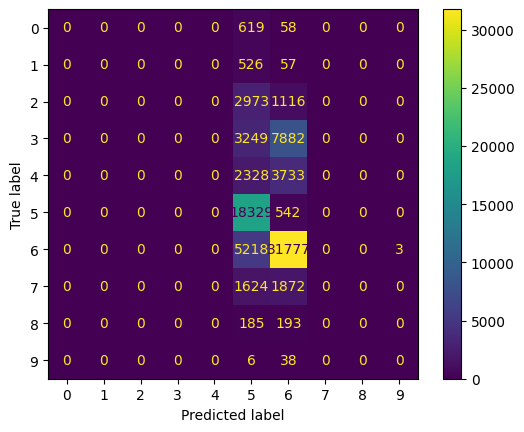

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_pred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()